In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms #necessary lib to implement


In [114]:
df=pd.read_csv("airline_passengers.csv")

In [115]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [116]:
df["Month"].dtypes

dtype('O')

In [117]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [118]:
df.dropna(axis=0,inplace=True) 

In [119]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [120]:
df['Month']=pd.to_datetime(df['Month'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [122]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [123]:
df.set_index("Month",inplace=True)

In [124]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<Axes: xlabel='Month'>

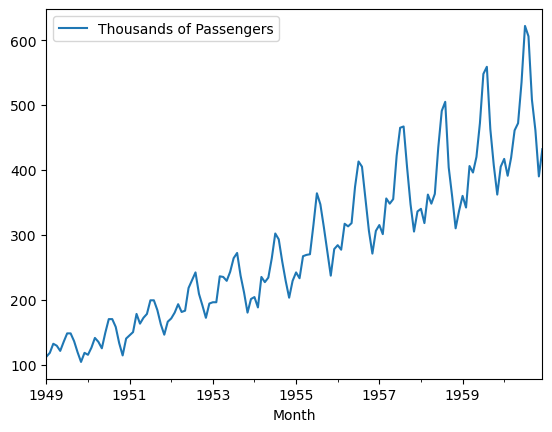

In [125]:
df.plot()

In [126]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

In [127]:
def adf_test(series):
    result=adfuller(series)
    print("ADF Statistics : {}".format(result[0]))
    print("p-value:{}".format(result[1]))
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis, The data has no unit root,indicating it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary")

In [128]:
adf_test(df['Thousands of Passengers'])

ADF Statistics : 0.8153688792060511
p-value:0.991880243437641
Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary


In [129]:
#Differencing technique

In [130]:
df['Passenger difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [131]:
df

,Thousands of Passengers,Passenger difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [132]:
adf_test(df['Passenger difference'].dropna())

ADF Statistics : -2.8292668241699874
p-value:0.05421329028382711
Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary


In [133]:
df['Second difference']=df['Passenger difference']-df['Passenger difference'].shift(1)

In [134]:
df.head()

,Thousands of Passengers,Passenger difference,Second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [135]:
adf_test(df['Second difference'].dropna())

ADF Statistics : -16.384231542468523
p-value:2.7328918500141235e-29
Strong evidence against null hypothesis, The data has no unit root,indicating it is stationary


In [136]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

In [137]:
df['Passenger 12 difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [138]:
df.head()

,Thousands of Passengers,Passenger difference,Second difference,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [139]:
adf_test(df['Passenger 12 difference'].dropna())

ADF Statistics : -3.3830207264924796
p-value:0.011551493085515008
Strong evidence against null hypothesis, The data has no unit root,indicating it is stationary


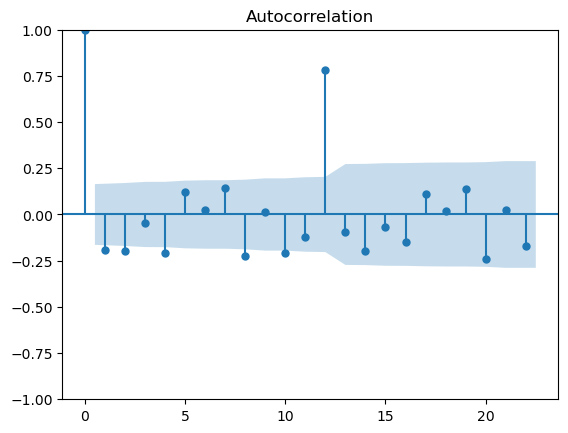

In [140]:
acf=plot_acf(df['Second difference'].dropna())

In [141]:
#q value is given by acf. the q value for the above graph is 13. we can alo see that there is seasonality.

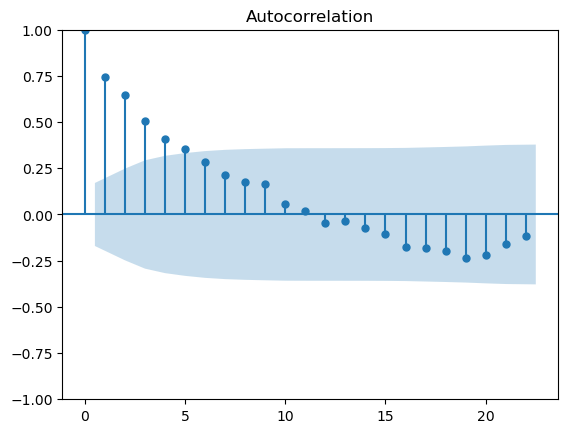

In [142]:
acf12=plot_acf(df['Passenger 12 difference'].dropna())

In [143]:
# Here the q value is 5

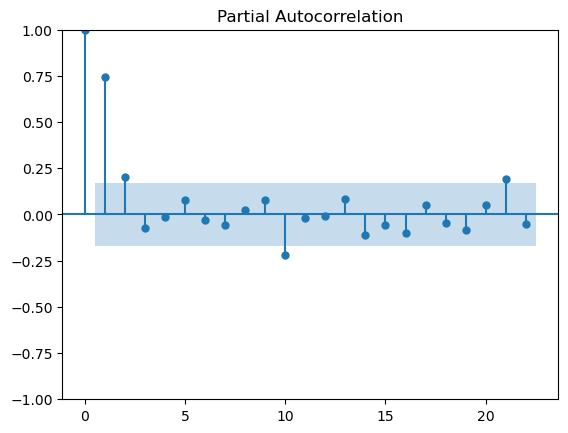

In [144]:
pacf=plot_pacf(df['Passenger 12 difference'].dropna())

In [145]:
# Here p=2 , otherwise we can try p=10

In [146]:
df

,Thousands of Passengers,Passenger difference,Second difference,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [147]:
from datetime import datetime,timedelta
train_dataset_end= datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [148]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [149]:
test_data

,Thousands of Passengers,Passenger difference,Second difference,Passenger 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [150]:
from statsmodels.tsa.arima.model import ARIMA


In [207]:
model = ARIMA(train_data['Thousands of Passengers'], order=(14,2,0))

C:\Users\shalu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shalu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shalu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [208]:
model_fit=model.fit()

C:\Users\shalu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\shalu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [209]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(14, 2, 0)   Log Likelihood                -306.771
Date:                     Mon, 09 Dec 2024   AIC                            643.542
Time:                             11:34:26   BIC                            679.643
Sample:                         01-01-1949   HQIC                           658.036
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1316      0.154     -7.366      0.000      -1.433      -0.831
ar.L2         -1.1814      0.218     -5.422      0.000      -1.608      -0.754
ar.L3         -1.4376      0.278     -5.167      0.000      -1.983      -0.892
ar.L4         -1.4868      0.276     -5.392      0.000      -2.027      -0.946
ar.L5         -1.4213      0.273     -5.209      0.000      -1.956      -0.887
ar.L6         -1.4438      0.284     -5.079      0.000      -2.001      -0.887
ar.L7         -1.3801      0.286     -4.828      0.000      -1.940      -0.820
ar.L8         -1.5010      0.299     -5.020      0.000      -2.087      -0.915
ar.L9         -1.3996      0.312     -4.484      0.000      -2.011      -0.788
ar.L10        -1.4522      0.312     -4.658      0.000      -2.063      -0.841
ar.L11        -1.3485      0.326     -4.136      0.000      -1.987      -0.709
ar.L12        -0.5485      0.310     -1.768      0.077      -1.156       0.059
ar.L13        -0.2822      0.286     -0.987      0.324      -0.843       0.278
ar.L14        -0.3243      0.168     -1.926      0.054      -0.654       0.006
sigma2        92.6831     23.482      3.947      0.000      46.659     138.707
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.94   Prob(JB):                         0.27
Heteroskedasticity (H):               2.14   Skew:                             0.44
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [210]:
pred=model_fit.predict(start=pred_start_date,end =pred_end_date)

In [211]:
pred_start_date = test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)


1956-01-01 00:00:00
1960-12-01 00:00:00


In [212]:
residuals=test_data['Thousands of Passengers']-pred

In [213]:
residuals

Month
1956-01-01     -8.601402
1956-02-01     -9.024012
1956-03-01     10.818430
1956-04-01     -1.309911
1956-05-01      2.119158
1956-06-01     11.672381
1956-07-01      5.603858
1956-08-01     16.708567
1956-09-01     -1.651731
1956-10-01    -16.306160
1956-11-01    -20.221707
1956-12-01    -18.187858
1957-01-01    -28.169781
1957-02-01    -30.029123
1957-03-01      6.906725
1957-04-01    -11.038473
1957-05-01     -9.450952
1957-06-01     13.878176
1957-07-01     14.508242
1957-08-01     36.804978
1957-09-01      3.334229
1957-10-01    -24.791426
1957-11-01    -38.674356
1957-12-01    -36.025926
1958-01-01    -51.322039
1958-02-01    -59.717955
1958-03-01    -29.315447
1958-04-01    -57.238619
1958-05-01    -49.007649
1958-06-01    -19.214857
1958-07-01     -2.005266
1958-08-01     32.050333
1958-09-01    -40.632256
1958-10-01    -62.163009
1958-11-01    -85.767591
1958-12-01    -82.783527
1959-01-01    -79.068157
1959-02-01    -82.275164
1959-03-01    -28.501380
1959-04-01    -55.2

<Axes: ylabel='Density'>

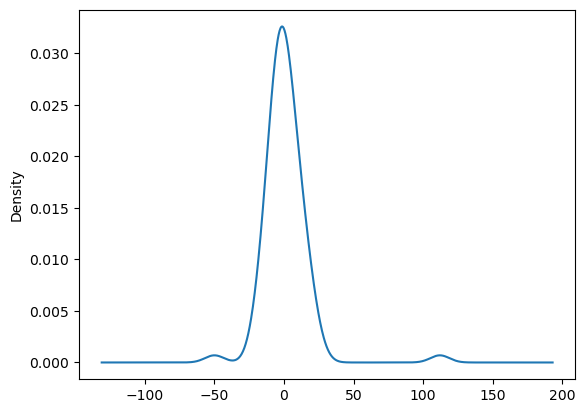

In [214]:
model_fit.resid.plot(kind="kde")

In [215]:
test_data['Predicted Arima']=pred

C:\Users\shalu\AppData\Local\Temp\ipykernel_21828\857688212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Arima']=pred


<Axes: xlabel='Month'>

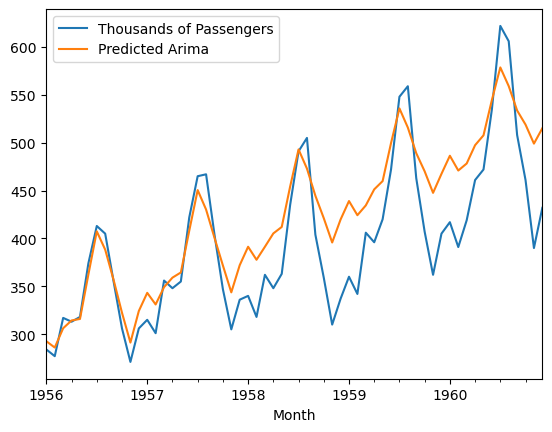

In [216]:
test_data[['Thousands of Passengers','Predicted Arima']].plot()

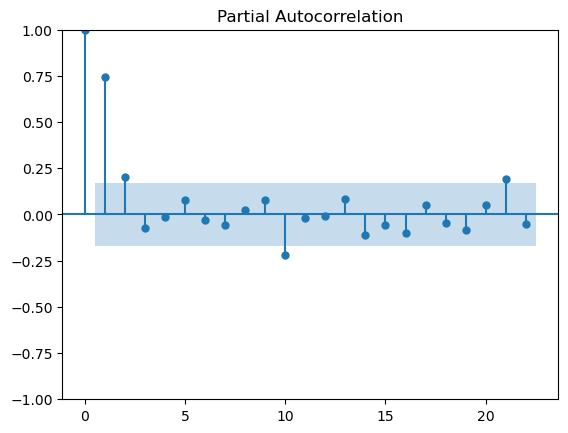

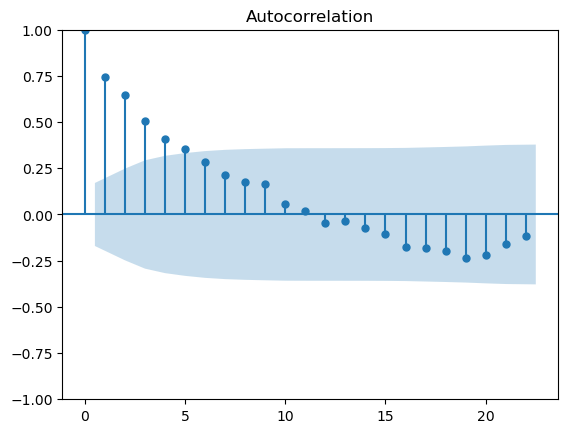

In [219]:
pacf=plot_pacf(df['Passenger 12 difference'].dropna())
acf=plot_acf(df['Passenger 12 difference'].dropna())

In [220]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [221]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\shalu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shalu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [222]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\shalu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [223]:

model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Mon, 09 Dec 2024   AIC                            548.481
Time:                                     11:39:39   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5995      0.939      0.638      0.523      -1.241       2.440
ar.L2          0.8314      0.232      3.577      0.000       0.376       1.287
ar.L3         -0.4539      0.896     -0.507      0.612      -2.209       1.301
ma.L1          0.1825      1.171      0.156      0.876      -2.112       2.477
ma.L2         -0.5355      1.269     -0.422      0.673      -3.023       1.952
ma.L3         -0.0986      0.386     -0.255      0.799      -0.856       0.659
ma.L4         -0.1270      0.340     -0.374      0.708      -0.793       0.539
ma.L5          0.2471      0.358      0.690      0.490      -0.455       0.949
sigma2        87.7135     81.766      1.073      0.283     -72.545     247.972
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [224]:

test_data.tail()

,Thousands of Passengers,Passenger difference,Second difference,Passenger 12 difference,Predicted Arima
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,559.107105
1960-09-01,508.0,-98.0,-82.0,45.0,533.649922
1960-10-01,461.0,-47.0,51.0,54.0,518.908077
1960-11-01,390.0,-71.0,-24.0,28.0,499.050194
1960-12-01,432.0,42.0,113.0,27.0,515.119336


In [225]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [226]:

pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

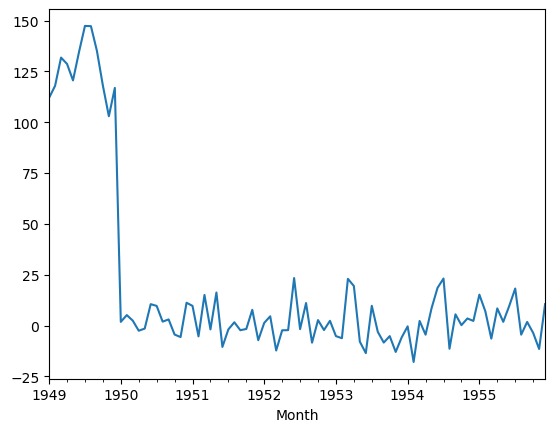

In [227]:

model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

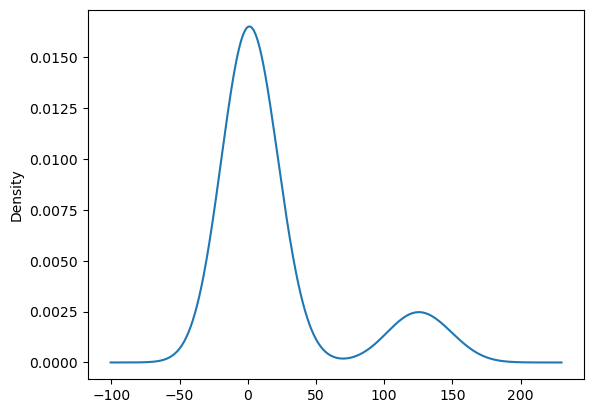

In [228]:
model_SARIMA_fit.resid.plot(kind='kde')

In [233]:

test_data['Predicted Sarima']=pred_Sarima

C:\Users\shalu\AppData\Local\Temp\ipykernel_21828\3839324945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Sarima']=pred_Sarima


<Axes: xlabel='Month'>

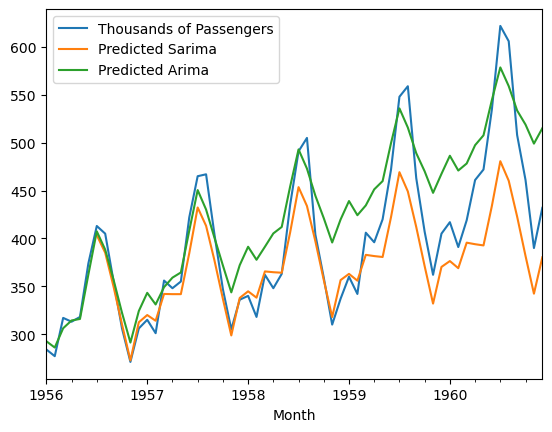

In [235]:
test_data[['Thousands of Passengers','Predicted Sarima','Predicted Arima']].plot()